https://arxiv.org/ftp/arxiv/papers/1204/1204.0375.pdf

Attempt to reproduce the kalman filter from this paper.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def gauss_pdf(X, M, S):
    """
    Return a 
    """
    if M.shape[1] == 1:
        DX = X - np.tile(M, X.shape[1])
        E = 0.5 * np.sum(DX * (np.dot(np.linalg.inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    elif X.shape[1] == 1:
        DX = np.tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (np.dot(np.linalg.inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    else:
        DX = X-M
        E = 0.5 * np.dot(DX.T, np.dot(np.linalg.inv(S), DX))
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    return (P[0],E[0]) 

In [42]:
def kf_predict(X, P, A, Q, B, U):
    """
    Predict the mean X and covariance P of the system state at
    time step k.
    """
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.T)) + Q
    return(X,P)

In [43]:
def kf_update(X, P, Y, H, R):
    """
    Compute the posterior mean X and covariance P given a 
    new measurement Y.
    """
    IM = np.dot(H, X)
    IS = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(P, np.dot(H.T, np.linalg.inv(IS)))
    X = X + np.dot(K, (Y-IM))
    P = P - np.dot(K, np.dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

In [44]:
#time step of mobile movement
dt = 0.1

# Initialization of state matrices
X = np.array([[0.0], [0.0], [0.1], [0.1]])
P = np.diag((0.01, 0.01, 0.01, 0.01))
A = np.array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = np.eye(X.shape[0])
B = np.eye(X.shape[0])
U = np.zeros((X.shape[0],1)) 

# Measurement matrices
Y = np.array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] + abs(np.random.randn(1)[0])]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = np.eye(Y.shape[0])

In [45]:
# Number of i
N_iter = 50
Y_path = []
Y_path_2 = []

# Applying the Kalman Filter
for i in np.arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = np.array([[X[0,0] + np.abs(0.1 * np.random.randn(1)[0])],[X[1, 0] + np.abs(0.1 * np.random.randn(1)[0])]])
    Y_path.append(Y[0][0])
    Y_path_2.append(Y[1][0])

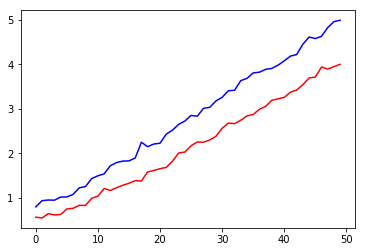

In [46]:
plt.plot(Y_path, 'r')
plt.plot(Y_path_2, 'b')